In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df = pd.read_pickle('data/cleaned_data.pkl')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

<Axes: title={'center': 'Correlation Of Features With Target Variable'}>

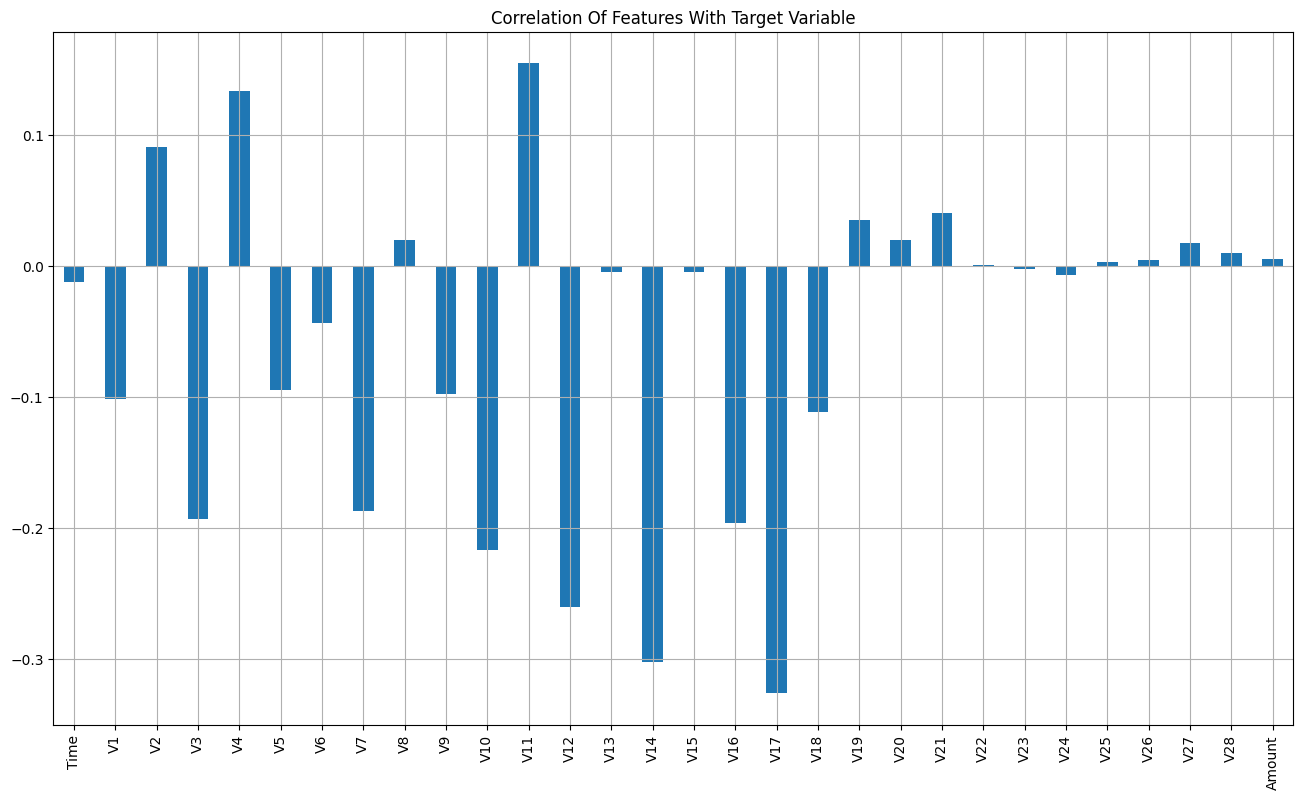

In [5]:
# Calculate the correlation coefficients between the 'Class' column and the first 30 columns 
x = df.corr()['Class'][:30]

# Create a bar plot to visualize the correlation of features with the target variable 'Class'
x.plot.bar(figsize=(16, 9), title="Correlation Of Features With Target Variable", grid=True)

In [6]:
x = df.corr()['Class'][:30]
max_corr = abs(x).max()
threshold = max_corr *0.3

x_df = df.corr()['Class'][:30][abs(df.corr()['Class'][:30]) > threshold]

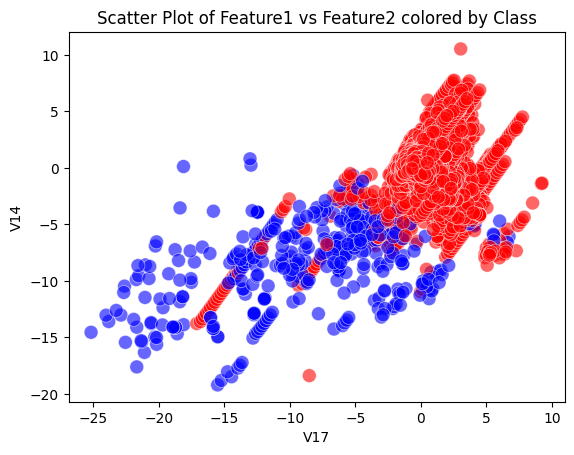

In [7]:
colormap = {0: 'red', 1: 'blue'}

# Map the colors to the Class column
colors = df['Class'].map(colormap)

# Create the scatter plot
plt.scatter(df['V17'], df['V14'], c=colors, s=100, alpha=0.6, edgecolors='w', linewidth=0.5)

# Add labels and title
plt.xlabel('V17')
plt.ylabel('V14')
plt.title('Scatter Plot of Feature1 vs Feature2 colored by Class')

# Display the plot
plt.show()


In [8]:
y = df.corr()['Class']

df2 = df.copy()
# Create a copy of the DataFrame df
df2 = df.copy()

# Iterate through columns and drop those with absolute correlation less than 0.13
for i in df.columns:
    if abs(y[i]) < 0.13:
        df2.drop(columns=[i], inplace=True)

from imblearn.under_sampling import RandomUnderSampler

# Separate features (X) and target (y)
X = df2.drop('Class', axis=1)
y = df2['Class']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and apply the resampler to the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
downsampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)


downsampled_df.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
138028,-0.666593,0.716564,0.388881,-0.597739,-0.325347,-0.216435,-1.054631,0.601226,0.631117,0
63099,0.904547,0.694584,0.495236,0.170547,0.821998,0.468322,0.573006,-0.011633,-0.504570,0
73411,1.122074,-1.308725,-0.701304,2.051312,0.575866,-0.594037,-0.338340,-0.756390,0.535141,0
164247,-0.987421,-0.029567,0.775644,-1.238598,-0.841133,-0.586472,-0.436671,0.266437,0.703234,0
148999,0.269272,3.866438,-0.721945,1.166335,1.297531,-1.920966,1.323225,1.317655,-0.441076,0


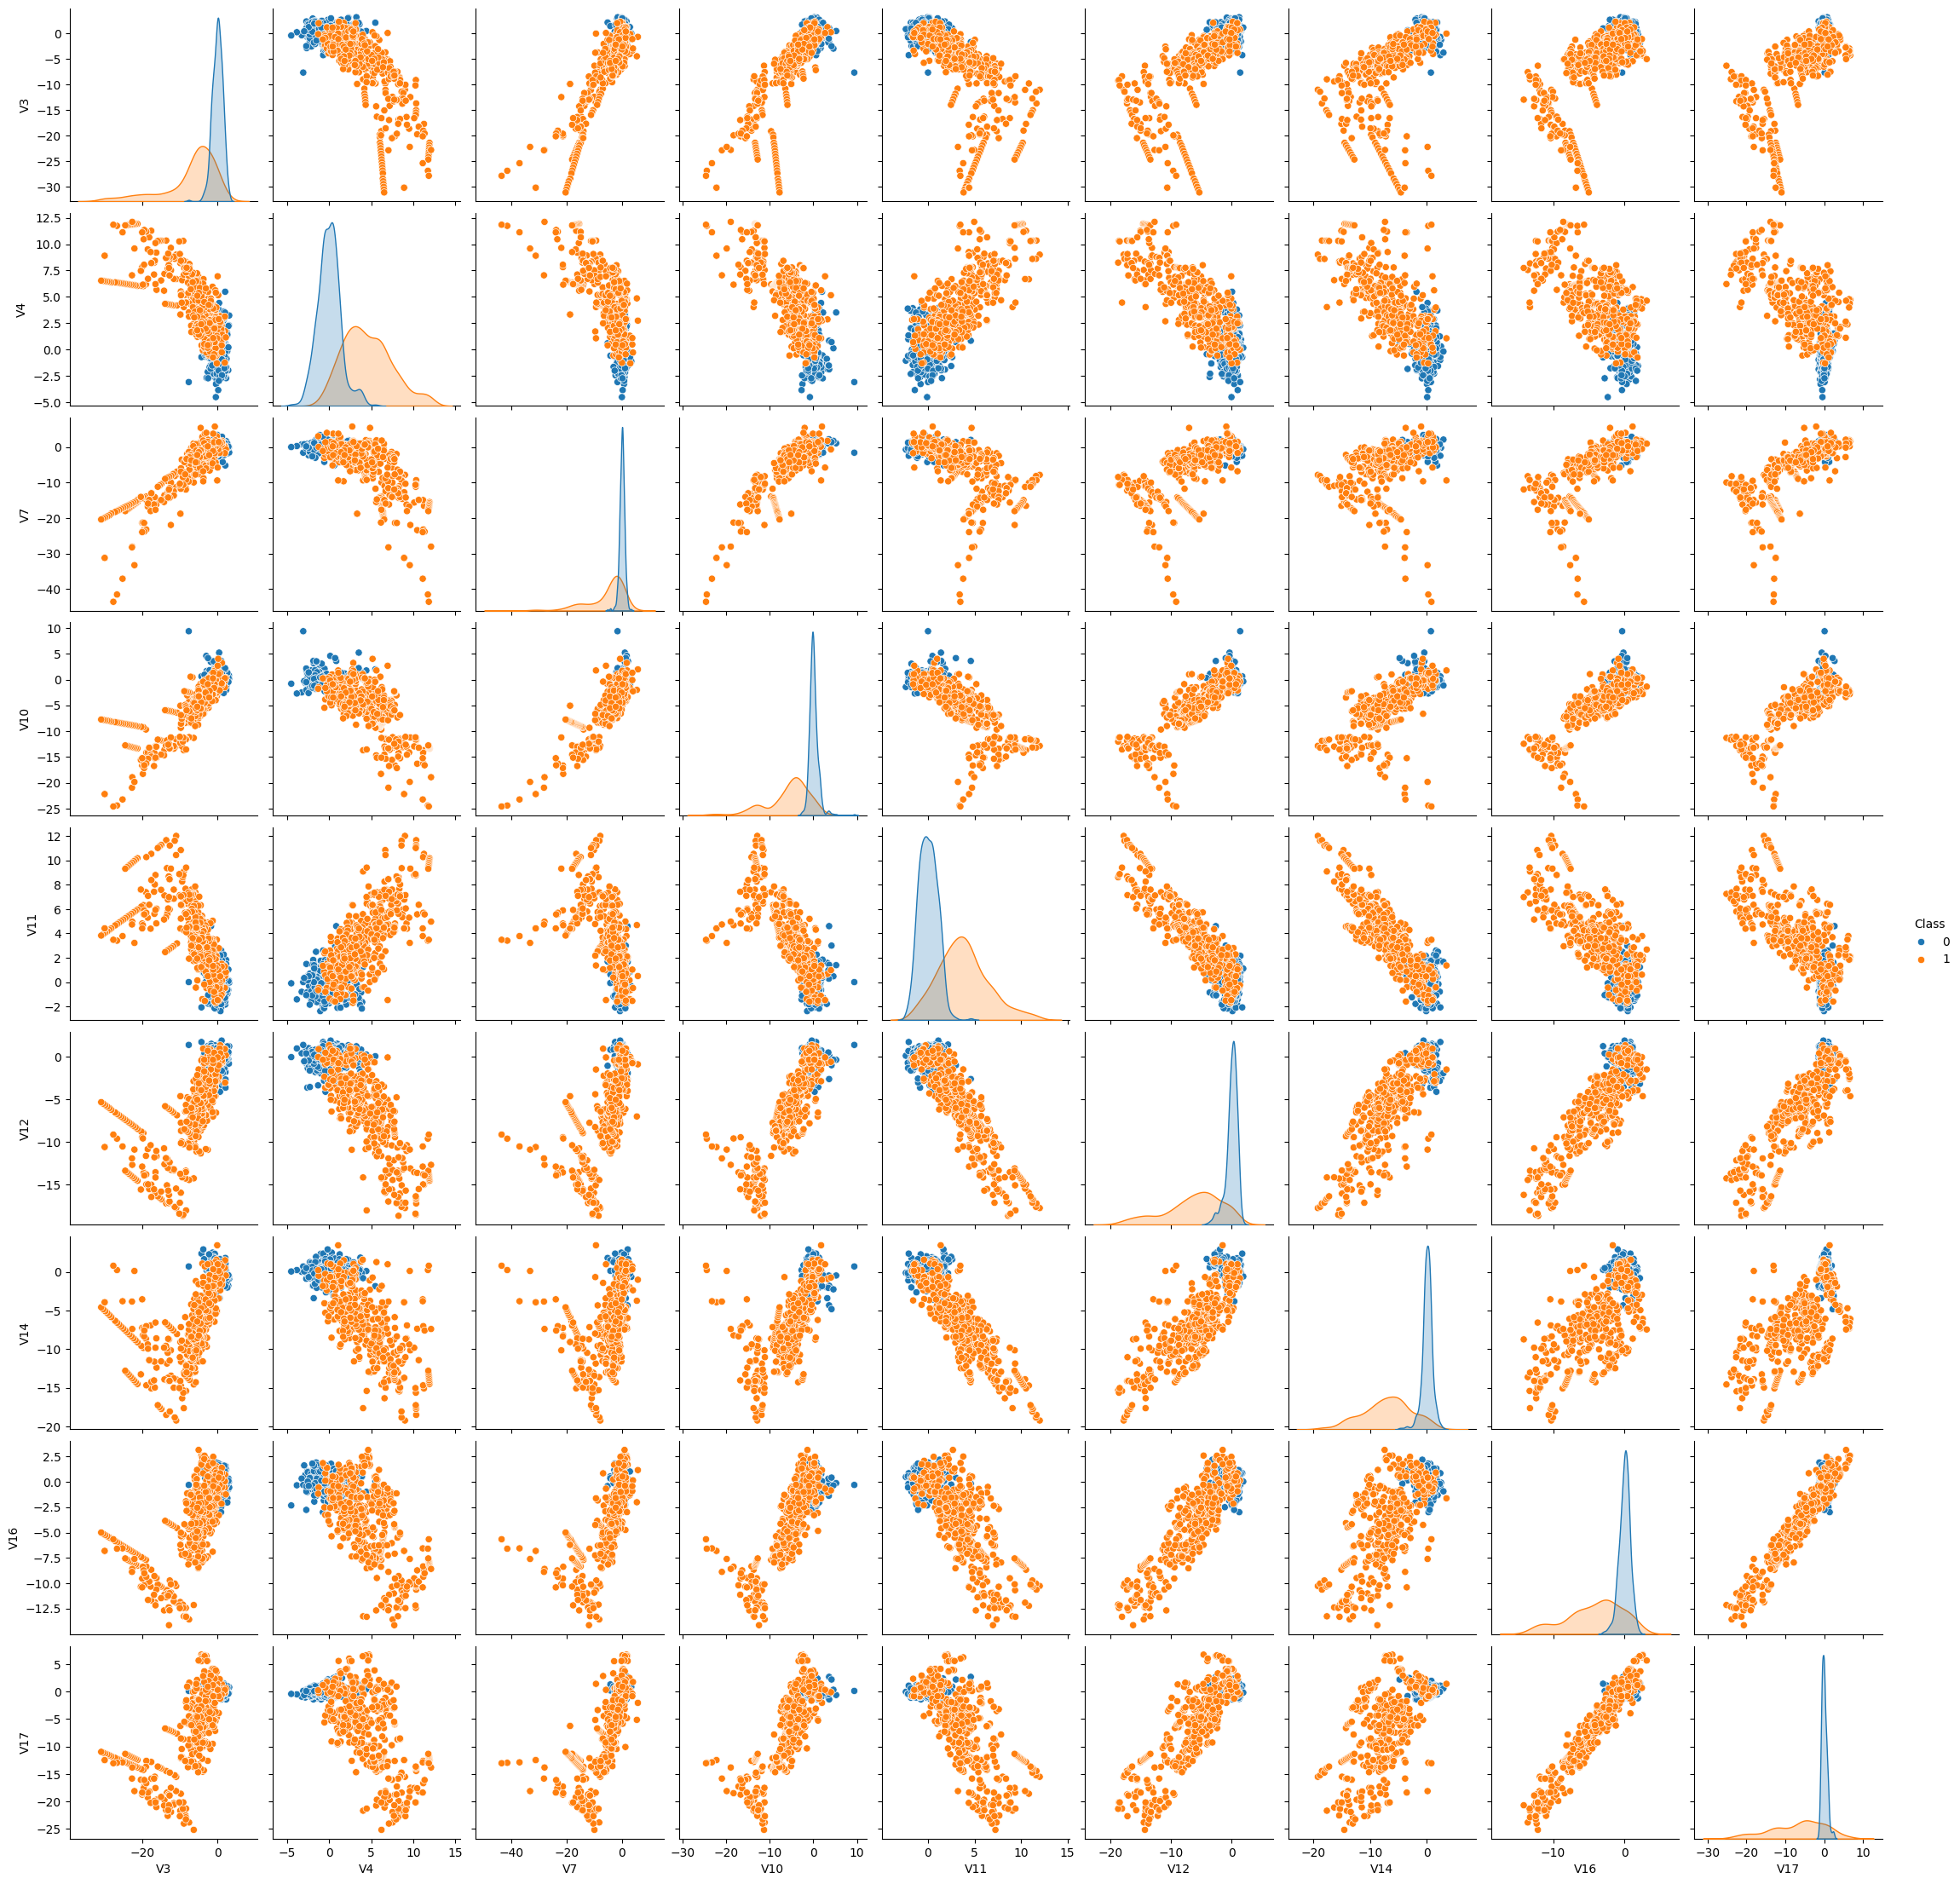

In [9]:
# sns.pairplot(df, hue='Class')
sns.pairplot(downsampled_df, hue='Class')

In [10]:
from sklearn.model_selection import train_test_split
# from flaml import AutoML

# Separate features and target
X = downsampled_df.drop(columns= 'Class')
y = downsampled_df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve, confusion_matrix

In [12]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier(),
    "Label Spreading":LabelSpreading(),
    "Label Propagation":LabelPropagation()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {}".format(round(model_train_accuracy*100 ,2)))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {}'.format(round(model_test_accuracy*100,2)))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 94.79
- F1 score: 0.9478
- Precision: 0.9809
- Recall: 0.9137
- Roc Auc Score: 0.9479
----------------------------------
Model performance for Test set
- Accuracy: 91.88
- F1 score: 0.9187
- Precision: 0.9457
- Recall: 0.8878
- Roc Auc Score: 0.9186


Decision Tree
Model performance for Training set
- Accuracy: 100.0
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 89.85
- F1 score: 0.8985
- Precision: 0.8980
- Recall: 0.8980
- Roc Auc Score: 0.8985


Random Forest
Model performance for Training set
- Accuracy: 100.0
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 92.39
- F1 score: 0.9237
- Precision: 0.9560
- Recall: 0.8878
- Roc Auc Score: 0.9237


Gradient Boost
Model performance for Training set
- Ac

/Users/karankaran/Desktop/Github_Karan/CreditCard_FraudDetection/venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Label Spreading
Model performance for Training set
- Accuracy: 100.0
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 93.4
- F1 score: 0.9339
- Precision: 0.9670
- Recall: 0.8980
- Roc Auc Score: 0.9338


Label Propagation
Model performance for Training set
- Accuracy: 100.0
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 93.4
- F1 score: 0.9339
- Precision: 0.9670
- Recall: 0.8980
- Roc Auc Score: 0.9338




/Users/karankaran/Desktop/Github_Karan/CreditCard_FraudDetection/venv/lib/python3.11/site-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/Users/karankaran/Desktop/Github_Karan/CreditCard_FraudDetection/venv/lib/python3.11/site-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


<Axes: title={'center': 'Correlation Of Features With Target Variable'}>

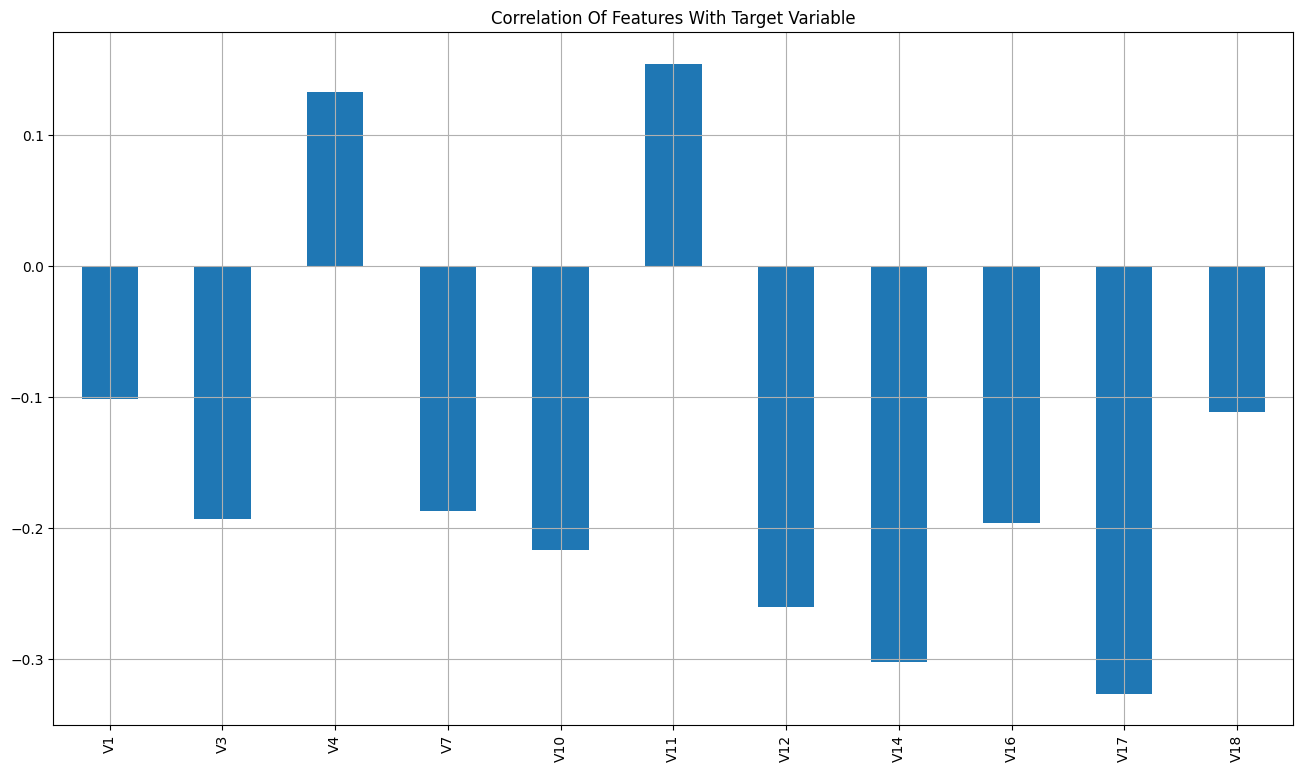

In [13]:
# Create a bar plot to visualize the correlation of features with the target variable 'Class'
x_df.plot.bar(figsize=(16, 9), title="Correlation Of Features With Target Variable", grid=True)

In [14]:
columns = x_df.index
columns

Index(['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17',
       'V18'],
      dtype='object')

In [15]:
X= df.drop(["Class"], axis=1)
y= df["Class"]
X = df[columns]

In [16]:
X.head()

,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
0,-1.359807,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,1.191857,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,-1.358354,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,-0.966272,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,-1.158233,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195


In [17]:
## Splitting the Train and test

y = y.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
y_train.shape

(227845, 1)

In [19]:
len(y_train[y_train == 0])

227451

In [20]:
len(y_train[y_train == 1])

394

In [21]:
X_train.head()

,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
223361,1.955041,-0.315013,0.330155,-0.627978,-0.030441,0.624996,1.691496,-0.253266,0.307252,-0.930844,0.651666
165061,-0.400975,1.555339,-2.017772,0.017959,0.611115,-1.945070,-0.726597,-1.193347,-0.160123,-1.630444,2.106866
238186,0.072509,-0.561351,-0.709897,0.787858,-0.638222,0.521931,-0.072768,-0.640249,0.678131,0.044374,0.521919
150562,-0.535045,1.750679,2.769390,0.847902,0.560595,-0.855437,-4.179628,1.271254,1.458600,-0.613260,0.814931
138452,-4.026938,-0.429786,-0.029571,-0.435632,1.221746,0.472626,1.595929,0.187685,0.143332,0.007803,-0.055817


In [22]:
## Scaling the columns
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [23]:
X_test_scaled = scaler.transform(X_test)

In [24]:
X_test_scaled.shape

(56962, 11)

## Logistic Regression

In [25]:
model_lr = LogisticRegressionCV()
lr_scaled = LogisticRegressionCV()

In [26]:
model_lr.fit(X_train, y_train)

/Users/karankaran/Desktop/Github_Karan/CreditCard_FraudDetection/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

In [27]:
lr_scaled.fit(X_train_scaled, y_train)

/Users/karankaran/Desktop/Github_Karan/CreditCard_FraudDetection/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

In [28]:
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [29]:
y_pred = model_lr.predict(X_test)

In [30]:
print('Accuracy score:', round(accuracy_score(y_pred,y_test)*100,3))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

Accuracy score: 99.91
[[56855    42]
 [    9    56]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56897
           1       0.57      0.86      0.69        65

    accuracy                           1.00     56962
   macro avg       0.79      0.93      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [31]:
print('Accuracy score:', round(accuracy_score(y_pred_scaled,y_test)*100,3))
print(confusion_matrix(y_pred_scaled,y_test))
print(classification_report(y_pred_scaled,y_test))

Accuracy score: 99.891
[[56854    52]
 [   10    46]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56906
           1       0.47      0.82      0.60        56

    accuracy                           1.00     56962
   macro avg       0.73      0.91      0.80     56962
weighted avg       1.00      1.00      1.00     56962

